In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
np.seterr(divide='ignore')

data = pd.read_csv('C:/Users/david/Desktop/maturitni_prace/data_analysis_python/eff_october.csv', sep=',', header=None)

names = []
energy = np.array([])
eff = np.array([])
yerr = []
for i in range(3):
    names.append(data[i][0])
for j in range(1,31):
    eff = np.append(eff, float(data[0][j]))
    yerr = np.append(yerr, float(data[1][j]))
    energy = np.append(energy, float(data[2][j]))

In [7]:
def func(x, a, b, c, d, e, f):
    return a * np.log(x)+ b * pow(np.log(x), 2) + c * pow(np.log(x), 3) + d * pow(np.log(x), 4) + e *pow(np.log(x), 5) + f

output = []
pars, cov = curve_fit(f=func, xdata=energy, ydata=eff, sigma=1./(np.log((yerr*eff))**2))
coeff_err = np.sqrt(np.diag(cov))
'''
for i in range(len(pars)):
    output.append('a{0} = {1:.6f} +- {2:.7f} ({3:d} %)'.format(i, pars[i], coeff_err[i], abs(int(coeff_err[i]/pars[i]*100))))
for i in output:
    print(i)
'''

global eff_param
eff_param = pars

In [8]:
file1 = open(r'C:\Users\david\Desktop\maturitni_prace\UmassCoefff.txt', 'r')
#soubor skopirovaných dat z https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z92.html
energy_as_x_to_masscoeff = [] #MeV
masscoef_U = [] #(cm2/g)
v1_density = 18.37414276 #g/cm3
v1_height =  9.99 / 10 #cm

def linear(x, a, b):
    return a * (x) + b

for line in file1:
    energy_as_x_to_masscoeff.append(float(line[3:14]))
    masscoef_U.append(float(line[15:25]))

c:\Users\david\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\david\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


30.608018026179913
2.321943623537837
31.088246380832555
2.3471096295283784
energy is 74 and absorbtion is 82.36233378555589
energy is 95 and absorbtion is 42.47983752244767
energy is 98 and absorbtion is 38.51223813583122
energy is 111 and absorbtion is 28.41477216268068
energy is 114 and absorbtion is 26.382299513099884
energy is 185 and absorbtion is 30.945990311806046


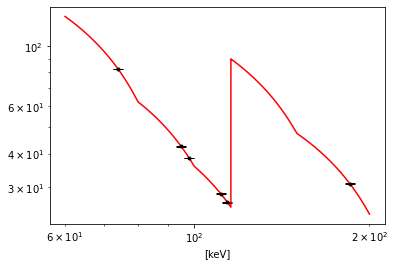

In [10]:
def calculate_absorbtion(energy, energy_x_values = energy_as_x_to_masscoeff, D = v1_height, density = v1_density):
    energy = energy/1000    #prevede keV na MeV
    for k in range(len(energy_x_values)):
        eng = energy_x_values[k]
        if eng > energy:
            pars, cov = curve_fit(f=linear, xdata=[last_eng, eng], ydata=[masscoef_U[k-1], masscoef_U[k]])
            masscoef_of_U = linear(energy, *pars)

            return (masscoef_of_U * density * D)/(1 - np.exp(-(masscoef_of_U * density * D)))
        
        last_eng = eng

print(calculate_absorbtion(185.712, D = 9.99 / 10))
print(calculate_absorbtion(766.38, D = 9.99 / 10))
print(calculate_absorbtion(185.712, D = 10.02 / 10, density= 18.60655066))
print(calculate_absorbtion(766.38, D = 10.02 / 10, density= 18.60655066))
x = calculate_absorbtion(185.712, D = 9.99 / 10)
y = calculate_absorbtion(766.38, D = 9.99 / 10)
energys = [74, 95, 98, 111, 114, 185]
abs = []
for i in energys:
    x = calculate_absorbtion(i)
    abs.append(x)#avg rth je 33.947286
    print("energy is {} and absorbtion is {}".format(i, x))



p = np.linspace(60, 200, 10000)
plt.errorbar(energys, abs, yerr=0.08, fmt=".", elinewidth=1, capsize=5, ecolor='black',color='black')
p_list = list(p)
x = []
for i in p_list:
    x.append(calculate_absorbtion(i))

plt.plot(p, x, c="red")
plt.xlabel("[keV]")
plt.yscale('log')
plt.xscale('log')
